In [6]:
# 1. Сформулировать постановку задачу, которую хочется решать в рамках курса.

# Бизнес-задача - реализовать модель, способную прогнозировать отток клиентов компании, что поможет заранее начинать удерживать тех, кто, вероятно, может уйти.

# ML-задача - бинарная классификация, целевая переменная - churn (уход клиента). 0 - если клиент останется в компании, 1 - если клиент уйдет.
# Модель машинного обучения должна на основе исторических данных о клиентах и их поведении предсказать вероятность принадлежности каждого клиента к классу.

# Набор данных - датасет "Telco Customer Churn" c Kaggle. В датасете содержится информация и 7043 клиентах компании, каждая запись содержит 21 признак клиента.

In [7]:
# 2. Выбрать и обосновать метрику для измерения качества.

# Основная метрика - F1-Score, тк она как раз подходит для ситуаций с несбалансированными классами.
# А клиентов, ушедших из компании, обычно больше чем тех, кто остался.

# Также можно отдельно смотреть на:
# Precision - чтобы понимать, среди скольких "удержанных" нами клиентов действительно были те, кто хотел уйти. При низкой precision компания тратит деньги впустую на удержание лояльных клиентов.
# Recall - чтобы понимать, какую долю от всех ушедших клиентов мы смогли выявить. Слишком низкий recall будет означать, что мы упускаем много "уходящих" клиентов.

# ROC_AUC - поможет выбрать лучшую модель на этапе валидации, потому что она не зависит от конкретного порога уверенности.
# Также она может помочь выбрать идеальный порог уверенности - но это уже больше бизнесовая история, когда нам нужно найти баланс между напрасными затратами на лояльных клиентов и потерей доходов от ушедших.

In [9]:
# 3. Провести EDA на своих данных

In [17]:
import kagglehub
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [4]:
# Скачаем датасет
path = kagglehub.dataset_download("blastchar/telco-customer-churn")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'telco-customer-churn' dataset.
Path to dataset files: /kaggle/input/telco-customer-churn


In [8]:
df= pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [10]:
print("Размерность данных:", df.shape)

Размерность данных: (7043, 21)


In [31]:
df.isna().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
display(df.describe())

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [26]:
# Видим, что данные чистые, пропусков почти нет.
# Странно, что столбец TotalCharges имеет тип object, хотя должен быть числовым - надо поменять.

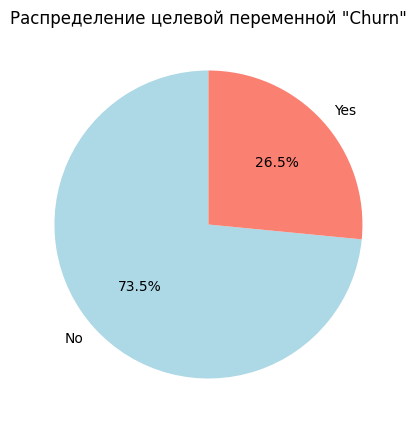

Соотношение классов: 2.77:1


/tmp/ipython-input-248458518.py:9: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Соотношение классов: {churn_counts[0] / churn_counts[1]:.2f}:1")


In [18]:
# Анализ целевой переменной

plt.figure(figsize=(8, 5))
churn_counts = df['Churn'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'salmon'])
plt.title('Распределение целевой переменной "Churn"')
plt.show()

print(f"Соотношение классов: {churn_counts[0] / churn_counts[1]:.2f}:1")

In [27]:
# Видим несбалансированность классов - лояльных клиентов (~73%) значительно больше, чем ушедших (~27%).
# Это подтверждает выбор F1-Score в качестве основной метрики. При обучении моделей, возможно, придется применить методы борьбы с дисбалансом (взвешивание классов, SMOTE и т.д.).

In [35]:
# Разделим признаки на логические группы для анализа
demographic_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
service_features = ['PhoneService', 'MultipleLines', 'InternetService',
                   'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies']
contract_features = ['Contract', 'PaperlessBilling', 'PaymentMethod']
numeric_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
target_feature = ['Churn']

print(f"Демографические признаки: {demographic_features}")
print(f"Признаки услуг: {service_features}")
print(f"Признаки контракта: {contract_features}")
print(f"Числовые признаки: {numeric_features}")

Демографические признаки: ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
Признаки услуг: ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
Признаки контракта: ['Contract', 'PaperlessBilling', 'PaymentMethod']
Числовые признаки: ['tenure', 'MonthlyCharges', 'TotalCharges']


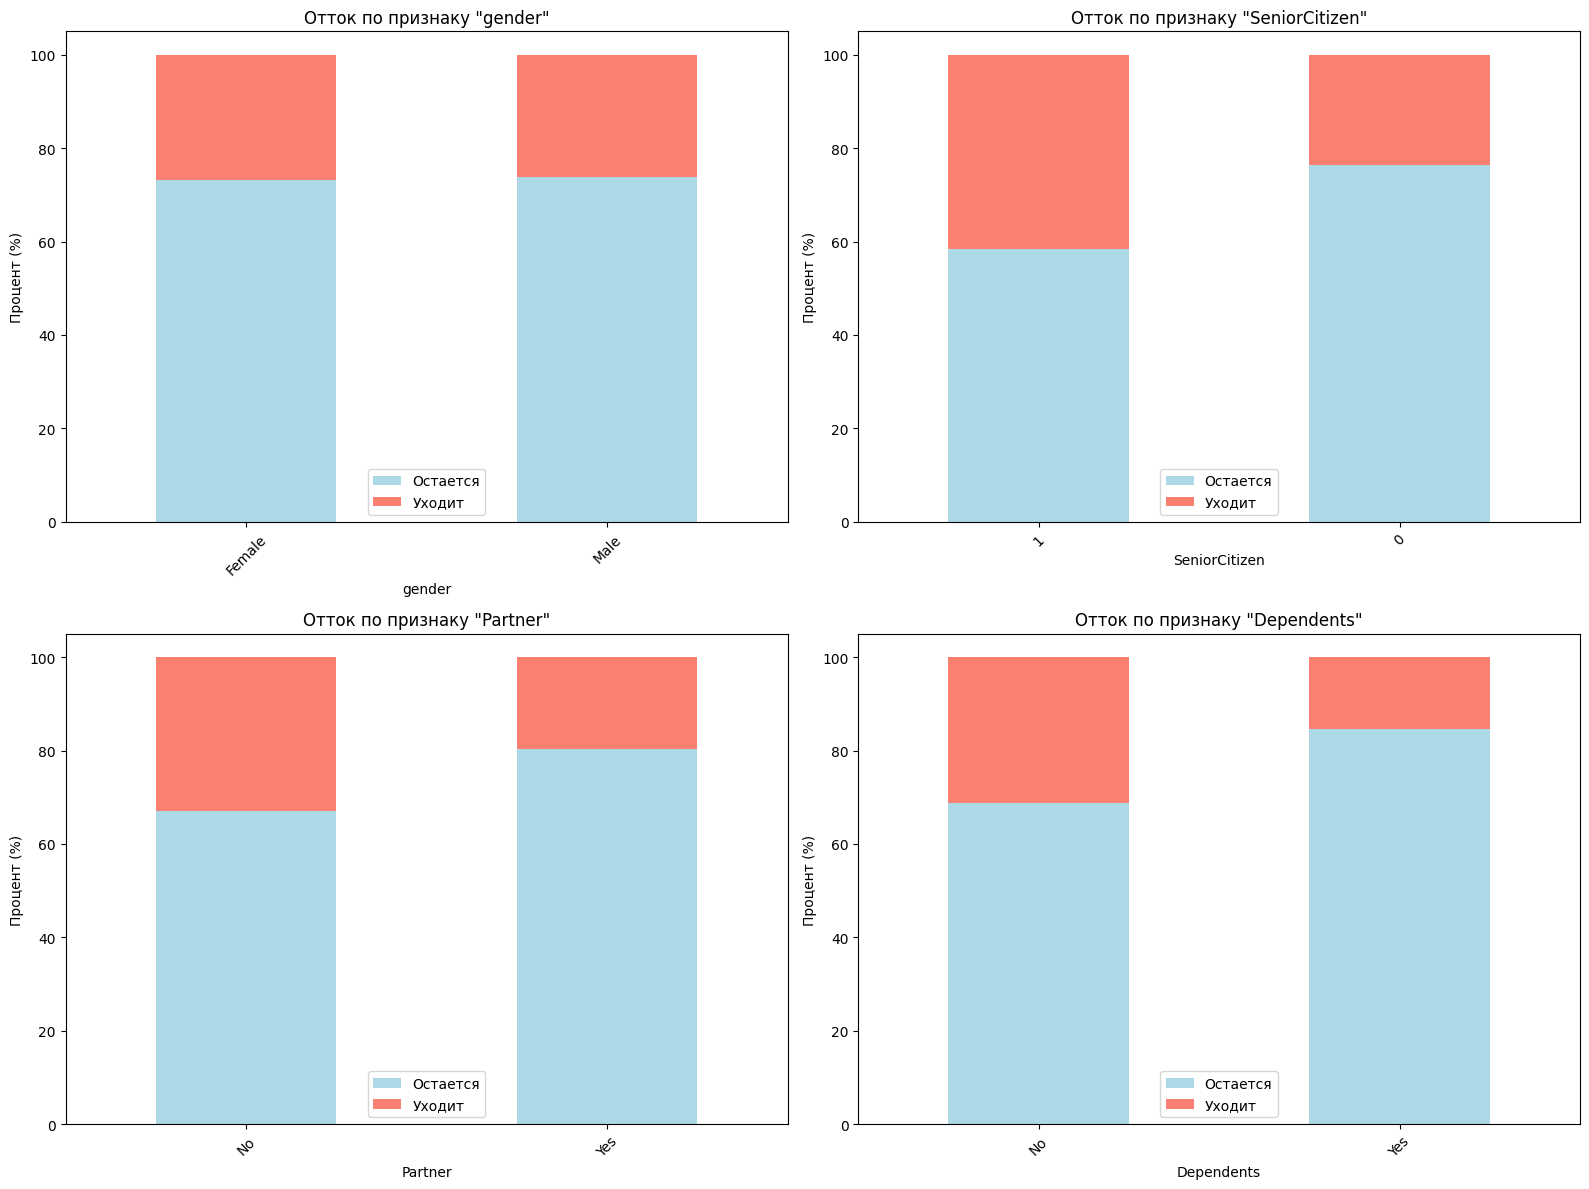

In [36]:
# Демографические признаки
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

for i, col in enumerate(demographic_features):
    # Строим столбчатую диаграмму с долей оттока
    churn_pivot = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    # Пробуем отсортировать, но если возникнет ошибка - строим без сортировки
    try:
        if 1 in churn_pivot.columns:
            churn_pivot = churn_pivot.sort_values(by=1, ascending=False)
        elif 'Yes' in churn_pivot.columns:
            churn_pivot = churn_pivot.sort_values(by='Yes', ascending=False)
    except:
        pass

    churn_pivot.plot(kind='bar', ax=axes[i], stacked=True, color=['lightblue', 'salmon'])
    axes[i].set_title(f'Отток по признаку "{col}"')
    axes[i].set_ylabel('Процент (%)')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(['Остается', 'Уходит'])

plt.tight_layout()
plt.show()

In [74]:
# Наблюдения:
# - Пол не влияет на уход.
# - Пенсионеры уходят чаще, чем не-пенсионеры.
# - Те, у кого нет партнера, уходят чаще.
# - Те, у кого нет иждивенцев, уходят чаще.

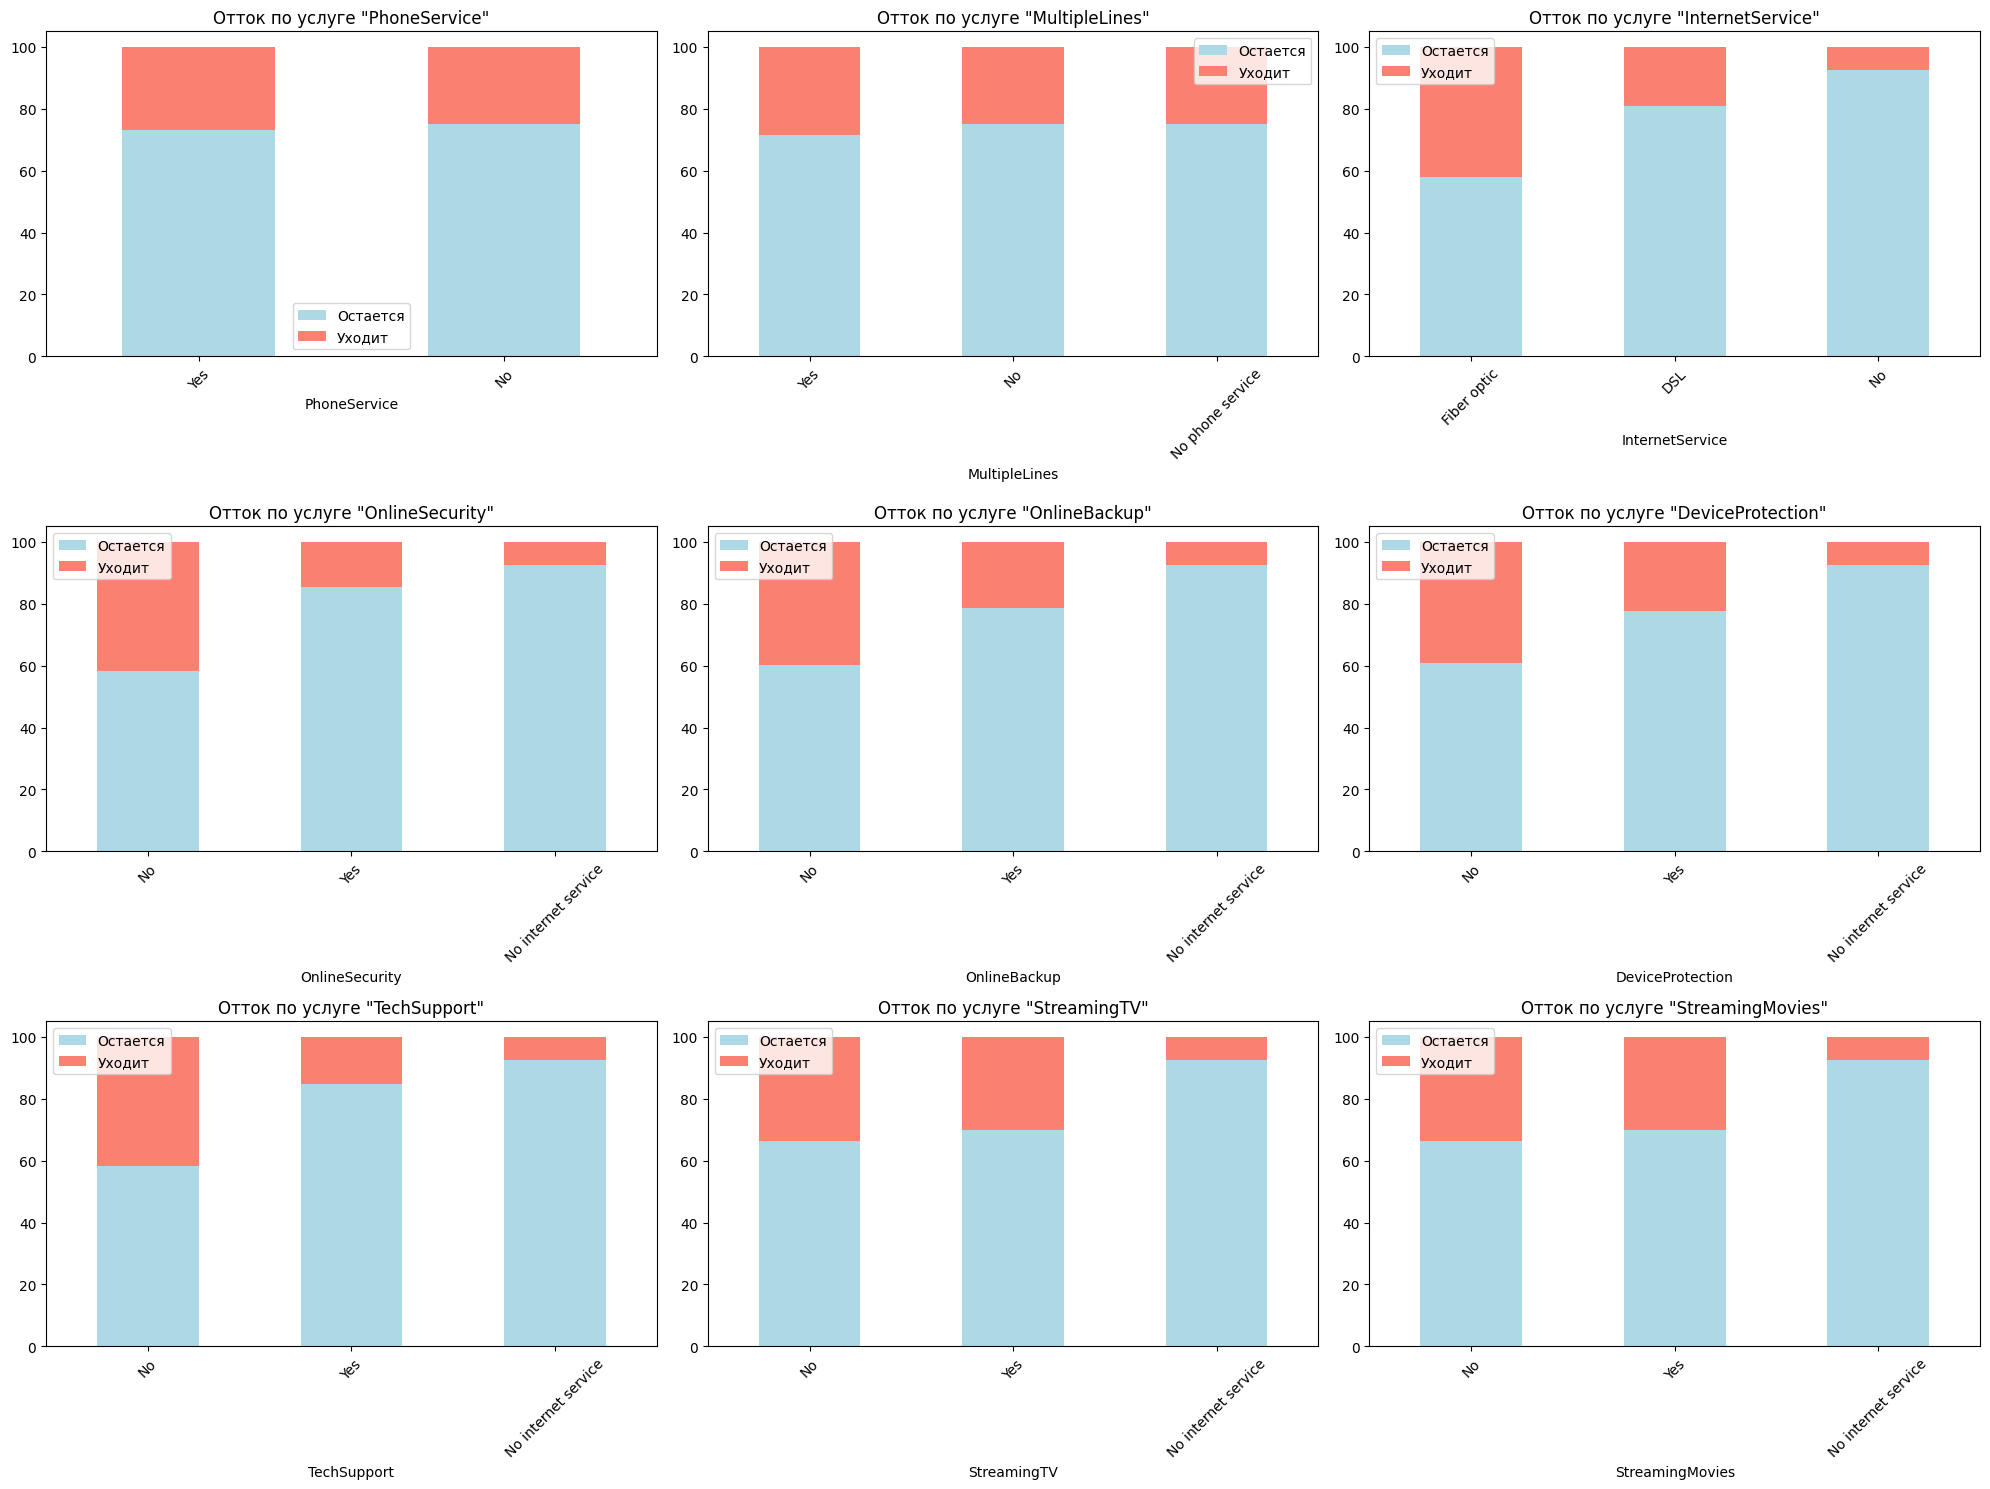

In [37]:
# Все сервисные признаки
fig, axes = plt.subplots(3, 3, figsize=(20, 15))
axes = axes.ravel()

for i, col in enumerate(service_features):
    if i < len(service_features):
        churn_pivot = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

        try:
            if 1 in churn_pivot.columns:
                churn_pivot = churn_pivot.sort_values(by=1, ascending=False)
            elif 'Yes' in churn_pivot.columns:
                churn_pivot = churn_pivot.sort_values(by='Yes', ascending=False)
        except:
            pass

        churn_pivot.plot(kind='bar', ax=axes[i], stacked=True, color=['lightblue', 'salmon'])
        axes[i].set_title(f'Отток по услуге "{col}"')
        axes[i].tick_params(axis='x', rotation=45)
        axes[i].legend(['Остается', 'Уходит'])

# Скрываем лишние subplots
for i in range(len(service_features), len(axes)):
    axes[i].set_visible(False)

plt.tight_layout()
plt.show()

In [41]:
# Наблюдения:
# - PhoneService и MultipleLines особо не влияют.
# - Те, у кого качество интернета выше, уходят чаще - видимо, не удовлетворены качеством услуг.
# - Те, у кого не настроено резервное копирование данных и защита устройства, уходят чаще.
# - Общение с техподдержкой снижает вероятность ухода.
# - StreamingTV и StreamingMovies можно считать уровнем продвинуточти клиента в технологиях. Чем он более продвинутый, тем чаще уходит.
# - И в целом, клиенты вообще БЕЗ интернета уходят РЕЖЕ (почти никогда).

# Получается, что чем "технологичнее" услуги у клиента, чем более он продвинутый, тем выше риск его черна.

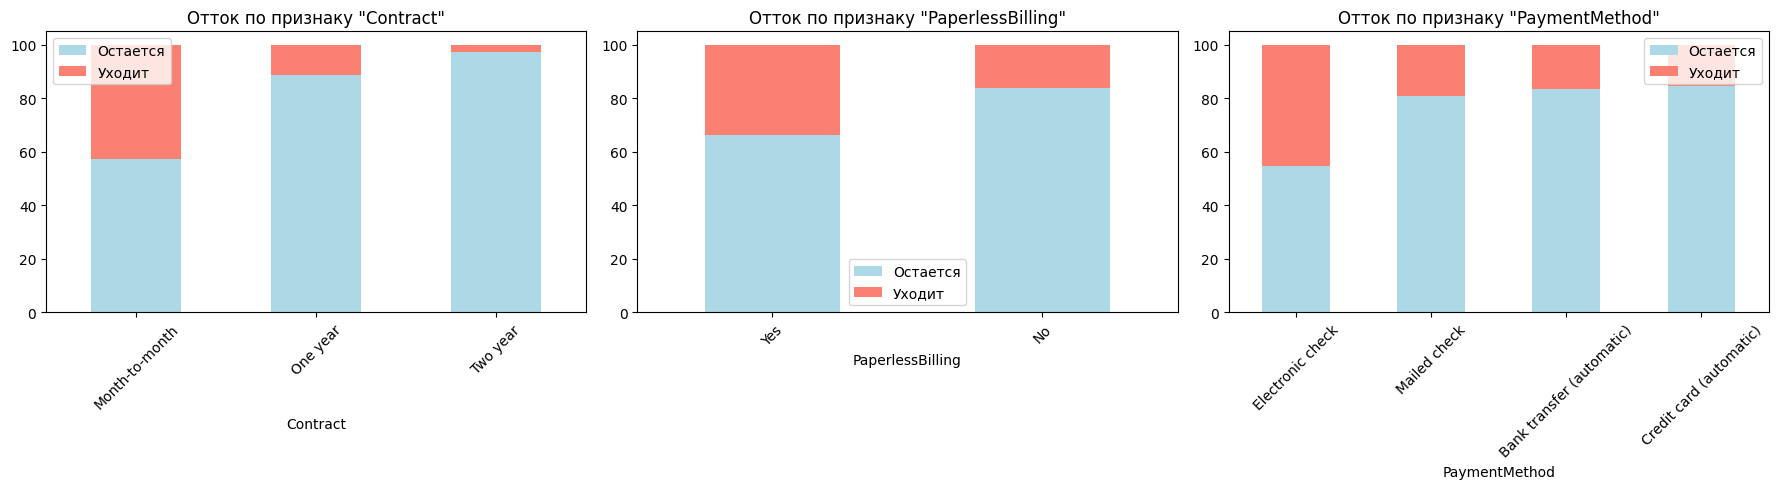

In [38]:
# Признаки контракта и оплаты
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
axes = axes.ravel()

for i, col in enumerate(contract_features):
    churn_pivot = pd.crosstab(df[col], df['Churn'], normalize='index') * 100

    try:
        if 1 in churn_pivot.columns:
            churn_pivot = churn_pivot.sort_values(by=1, ascending=False)
        elif 'Yes' in churn_pivot.columns:
            churn_pivot = churn_pivot.sort_values(by='Yes', ascending=False)
    except:
        pass

    churn_pivot.plot(kind='bar', ax=axes[i], stacked=True, color=['lightblue', 'salmon'])
    axes[i].set_title(f'Отток по признаку "{col}"')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].legend(['Остается', 'Уходит'])

plt.tight_layout()
plt.show()

In [68]:
# Наблюдения:
# - Чем короче у людей контракт с компанией (кол-во месяцев), тем чаще они уходят.
# - Те, у кого автоплатеж, уходят реже.
# - Признаки PaperlessBilling и PaymentMethod - про одно и то же, так что от чего-то одного можно безболезенно избавиться.
# Думаю, можно будет убрать PaperlessBilling - он слабее коррелирует с оттоком клиентов.

# Вывод - чем более предсказуемыми и автоматизированными являются отношения с клиентом, тем ниже вероятность его ухода.

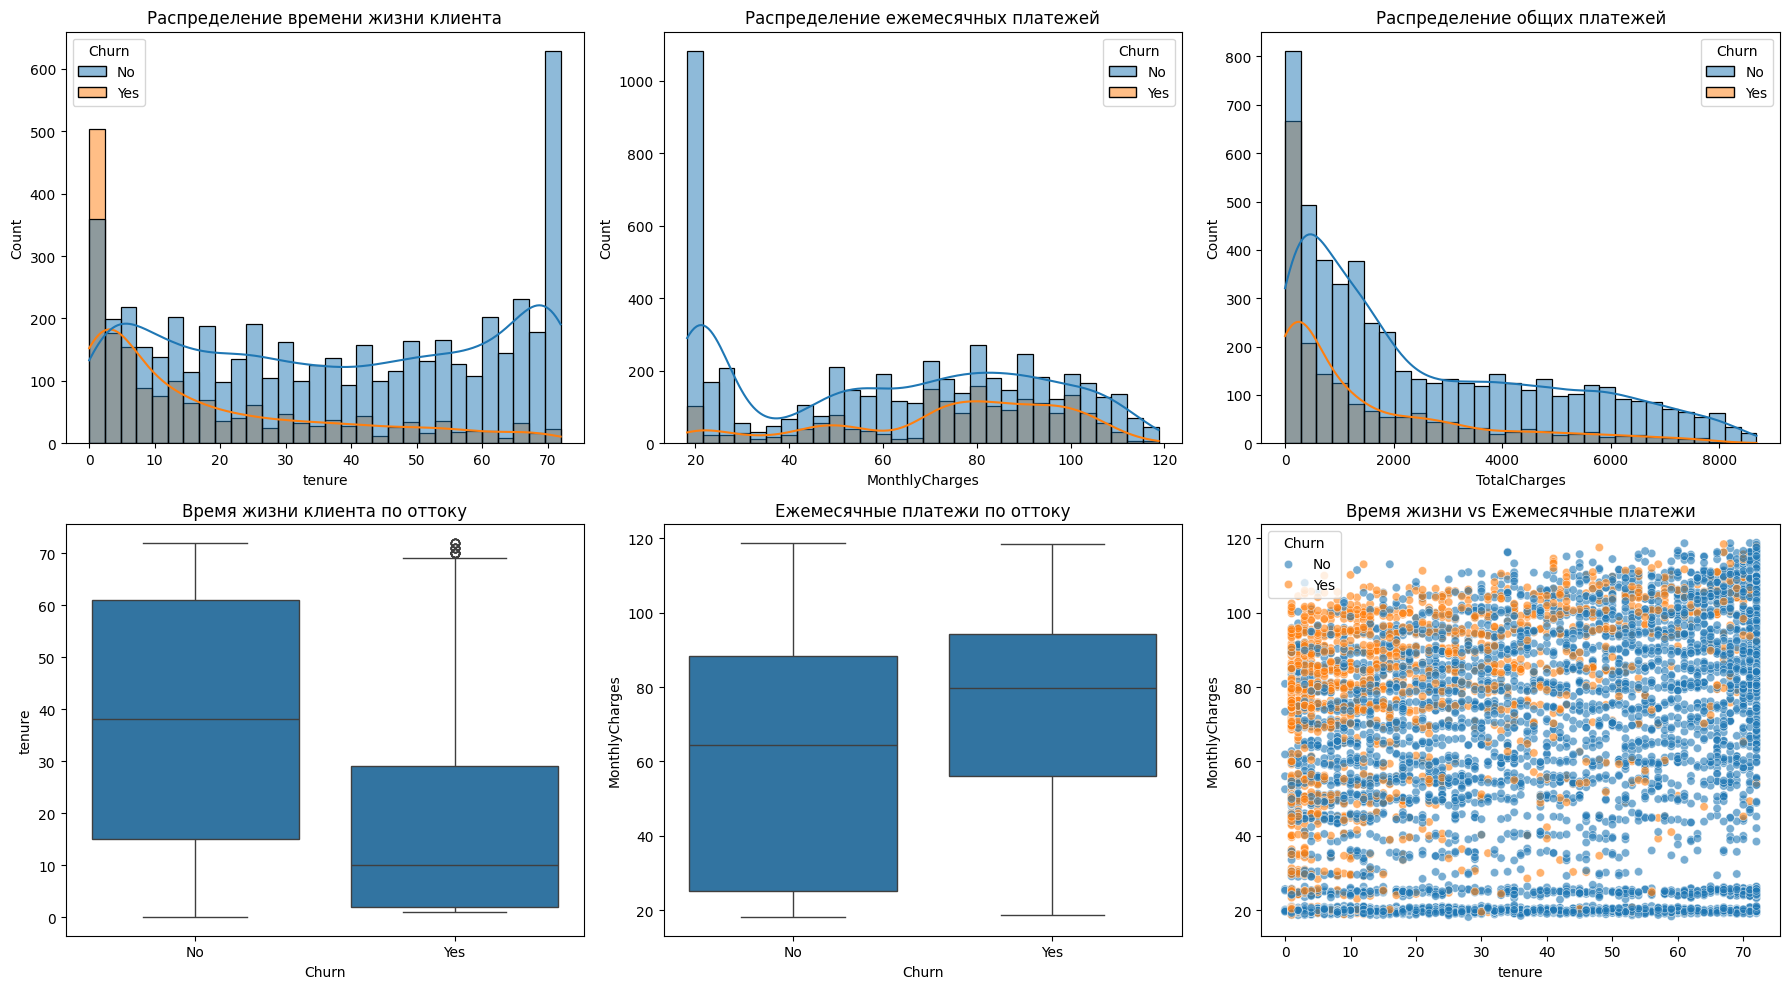

In [42]:
# Детальный анализ числовых признаков
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

# 1. Распределение tenure
sns.histplot(data=df, x='tenure', hue='Churn', bins=30, ax=axes[0], kde=True)
axes[0].set_title('Распределение времени жизни клиента')

# 2. Распределение MonthlyCharges
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', bins=30, ax=axes[1], kde=True)
axes[1].set_title('Распределение ежемесячных платежей')

# 3. Распределение TotalCharges
sns.histplot(data=df, x='TotalCharges', hue='Churn', bins=30, ax=axes[2], kde=True)
axes[2].set_title('Распределение общих платежей')

# 4. Boxplot tenure
sns.boxplot(data=df, x='Churn', y='tenure', ax=axes[3])
axes[3].set_title('Время жизни клиента по оттоку')

# 5. Boxplot MonthlyCharges
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', ax=axes[4])
axes[4].set_title('Ежемесячные платежи по оттоку')

# 6. Scatter: tenure vs MonthlyCharges
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6, ax=axes[5])
axes[5].set_title('Время жизни vs Ежемесячные платежи')

plt.tight_layout()
plt.show()

In [64]:
# Наблюдения:
# - Новые клиенты уходят чаще (tenure немного похож на Contract).
# - Клиенты с высокими платежами уходят чаще.

# - Первые месяцы - критическое время для удержания клиента, а высокая цена требует высочайшего качества, иначе клиенты уходят.

# Также ясно, что существует коллинеарность между tenure и TotalCharges.
# Логично: что чем дольше клиент с компанией (tenure), тем больше общая сумма платежей (TotalCharges).

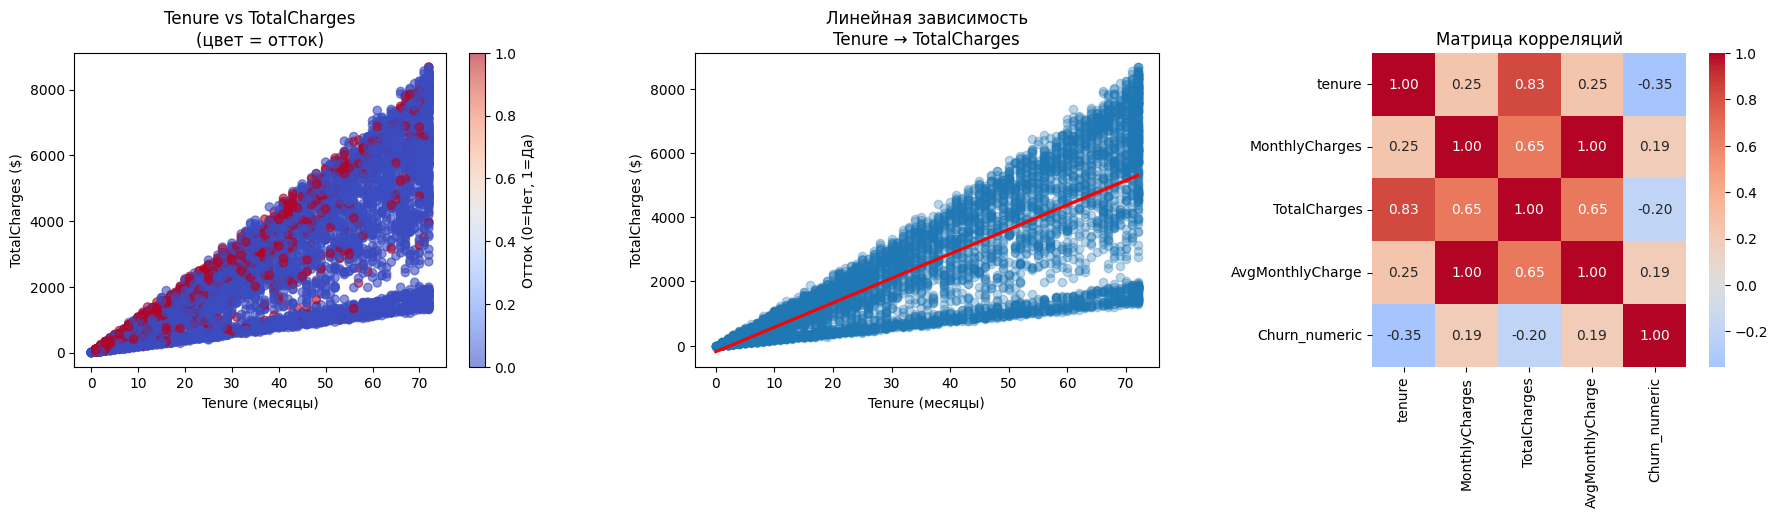

In [65]:
# Сначала создадим числовую версию целевой переменной
df['Churn_numeric'] = df['Churn'].map({'No': 0, 'Yes': 1})

# Визуализация мультиколлинеарности - только первые 3 графика
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Scatter plot: tenure vs TotalCharges
scatter = axes[0].scatter(df['tenure'], df['TotalCharges'],
                         c=df['Churn_numeric'], alpha=0.6, cmap='coolwarm')
axes[0].set_xlabel('Tenure (месяцы)')
axes[0].set_ylabel('TotalCharges ($)')
axes[0].set_title('Tenure vs TotalCharges\n(цвет = отток)')
plt.colorbar(scatter, ax=axes[0], label='Отток (0=Нет, 1=Да)')

# 2. Линейная регрессия
sns.regplot(data=df, x='tenure', y='TotalCharges', ax=axes[1],
           scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
axes[1].set_xlabel('Tenure (месяцы)')
axes[1].set_ylabel('TotalCharges ($)')
axes[1].set_title('Линейная зависимость\nTenure → TotalCharges')

# 3. Корреляционная тепловая карта
if 'AvgMonthlyCharge' not in df.columns:
    df['AvgMonthlyCharge'] = np.where(
        df['tenure'] == 0,
        df['MonthlyCharges'],
        df['TotalCharges'] / df['tenure']
    )
    df['AvgMonthlyCharge'] = df['AvgMonthlyCharge'].replace([np.inf, -np.inf], np.nan)
    df['AvgMonthlyCharge'] = df['AvgMonthlyCharge'].fillna(df['MonthlyCharges'])

corr_matrix = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'AvgMonthlyCharge', 'Churn_numeric']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
           fmt='.2f', ax=axes[2], square=True)
axes[2].set_title('Матрица корреляций')

plt.tight_layout()
plt.show()

In [75]:
# Расчет корреляции Пирсона между tenure и TotalCharges
pearson_corr = df['tenure'].corr(df['TotalCharges'])
print(f"Корреляция Пирсона: {pearson_corr:.4f}")

Корреляция Пирсона: 0.8262


In [71]:
# И правда - идеально прямая линия + сильная корреляция Пирсона.
# Мультиколлинеарность может сбить нашу будущую модель с толку, поэтому с ней надо будет что-то сделать.

In [70]:
# Итоги EDA и план предобработки:

# Есть проблема дисбаланса классов - понадобятся техники балансировки классов.
# Категориальные признаки - нужно будет их закодировать (One-Hot Encoding или Label Encoding в зависимости от признака).
# Также на этапе предобработки надо преобразовать TotalCharges в числовой формат, обработать возможные выбросы.
# Оставить PaymentMethod и убрать PaperlessBilling - он слабее коррелирует с оттоком клиентов.
# Можно создать новый признак — "Средний чек за месяц жизни"/"AvgMonthlyCharge" (TotalCharges / tenure), чтобы нивелировать связь двух признаков.